Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3
(4096,)


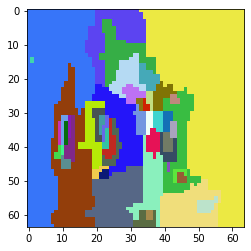

In [2]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,64#146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('0-64-60-124/spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA

n_pca=12


pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(FA_spatial)#components_

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

connectivity = grid_to_graph(n_x=64, n_y=64)

n_clusters_=50

ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)

labels = ward.labels_
print(labels.shape)
grains=labels.reshape((64,64))
colors=np.random.uniform(size=(n_clusters_,3))
sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
sample_silhouette_values=sample_silhouette_values.reshape((64,64))

im_hac=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(64):
        #if sample_silhouette_values[i,j] > 0:
        im_hac[i,j]=colors[grains[i,j]]
        #else:
        #    im_hac[i,j]=colors[grains[i,j]]#np.array([1.,1.,1.])
plt.imshow(im_hac)

<Figure size 432x288 with 0 Axes>

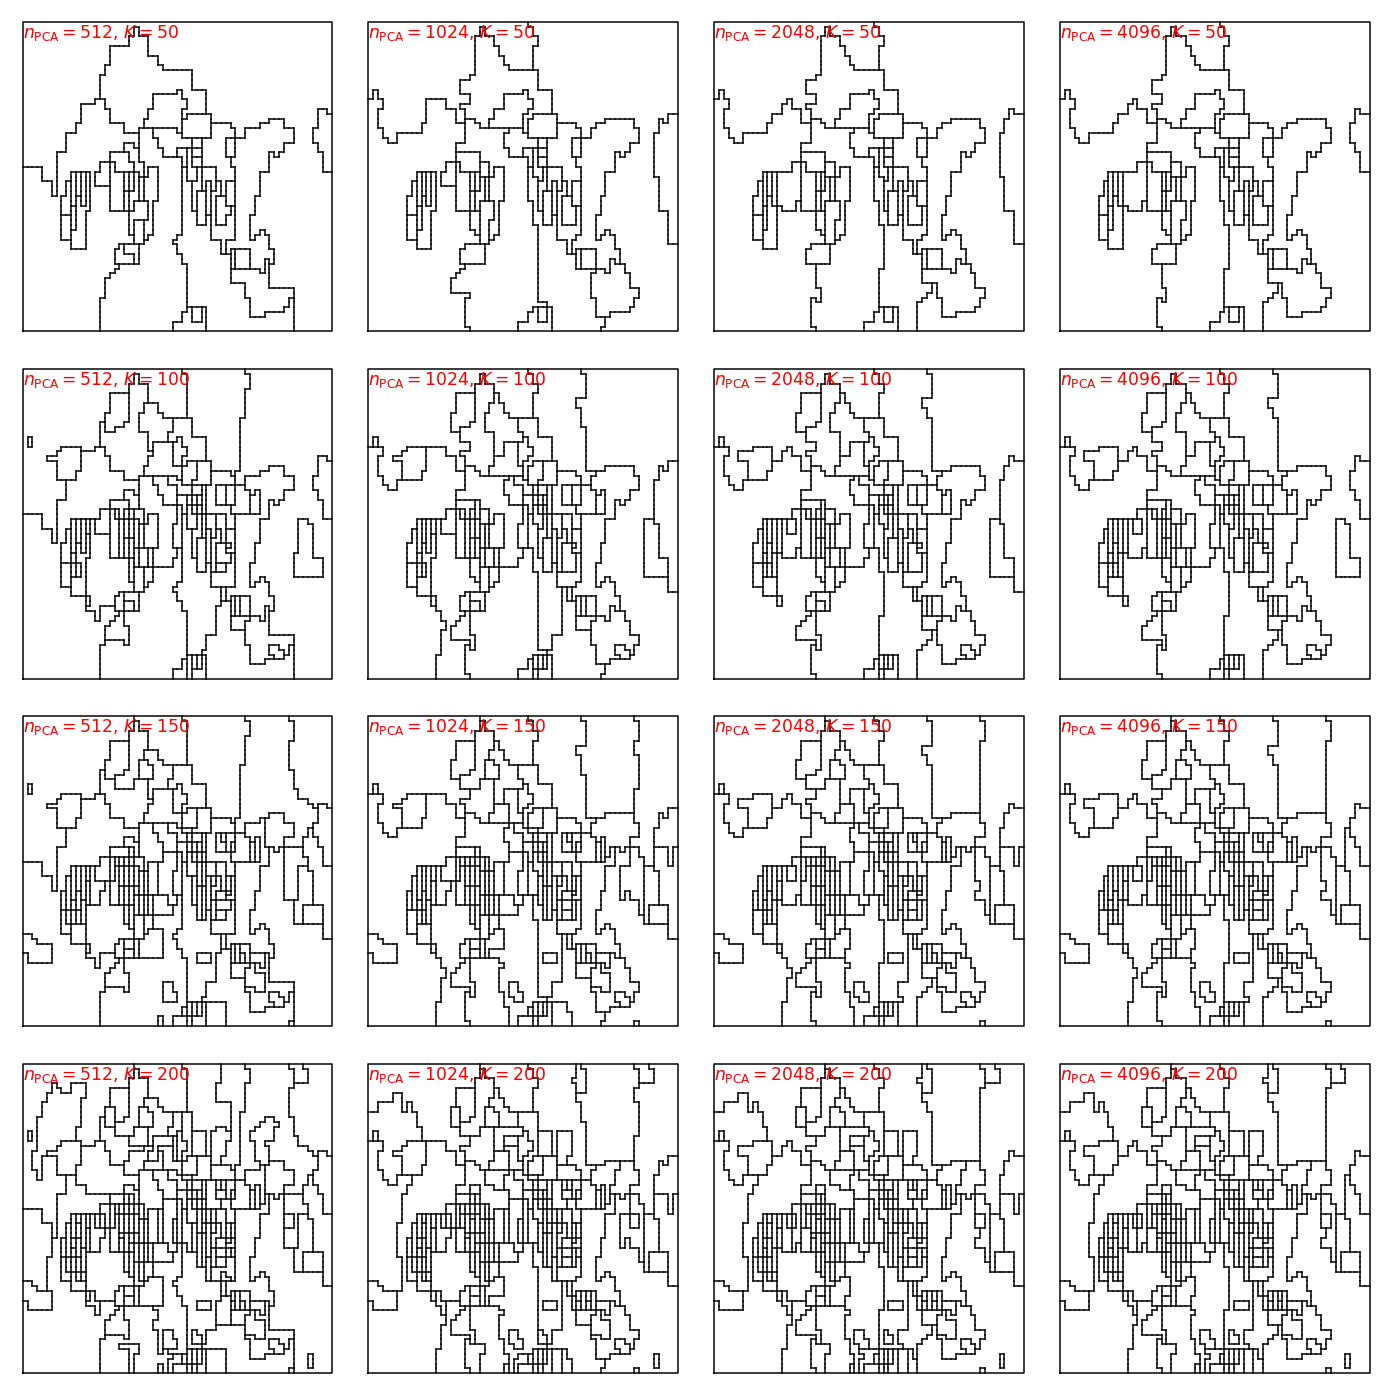

In [7]:
plt.clf()

def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.axis('off')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

nx,ny=64,64

FA_spatial=np.load('0-64-60-124/spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.6,bottom=0,top=1.6, wspace=0.002,hspace=0.02)

ns_pca=(512,1024,2048,4096)
ns_cluster=(50,100,150,200)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='ward').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')


<Figure size 432x288 with 0 Axes>

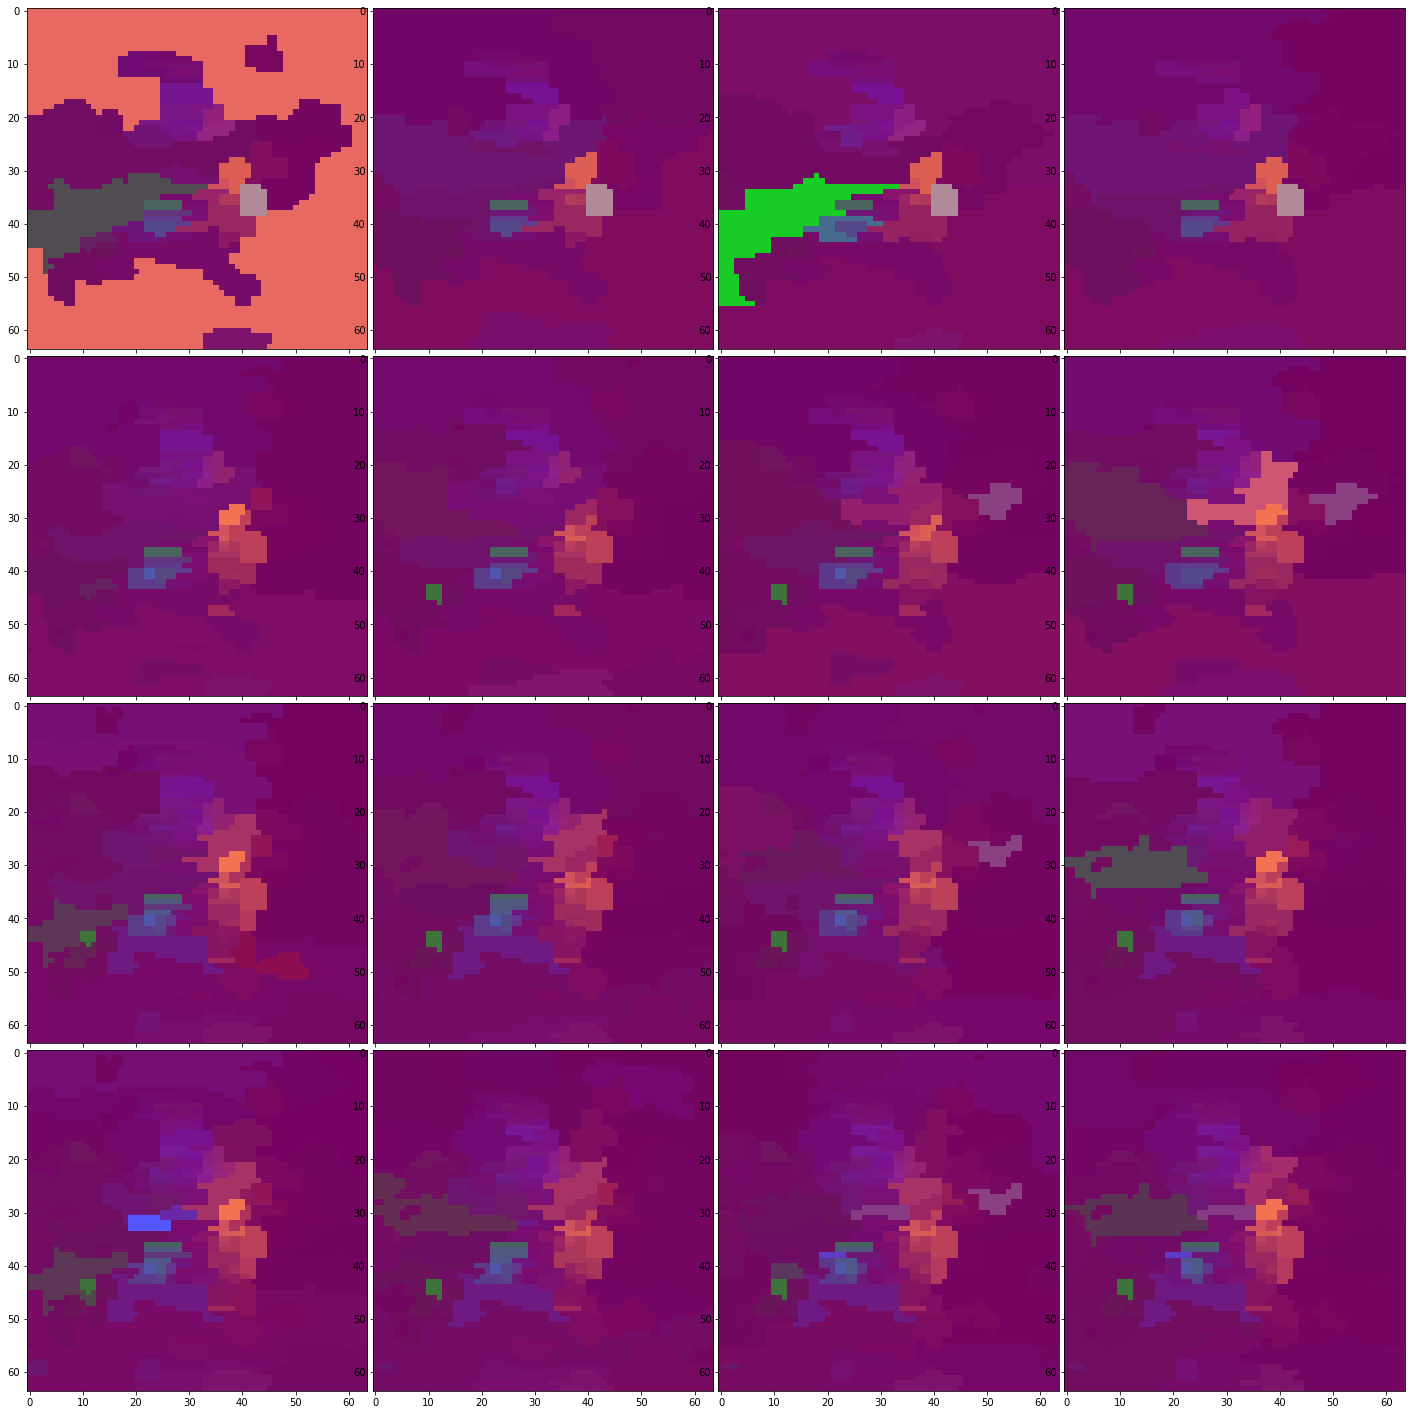

In [3]:
plt.clf()

def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.axis('off')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

nx,ny=64,64

FA_spatial=np.load('0-64-60-124/spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.6,bottom=0,top=1.6, wspace=0.002,hspace=0.02)

ns_pca=(128,256,512,1024)
ns_cluster=(50,100,150,200)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    pca_colors=pca_features.copy()[:,:3]
    for s in range(3):
        max_,min_=pca_colors[:,s].max(),pca_colors[:,s].min()
        for k in range(pca_colors.shape[0]):
            pca_colors[k,s]=(pca_colors[k,s]-min_)/(max_-min_)
    pca_colors=pca_colors.reshape((nx,ny,3))
    for j in range(4):
        im=np.zeros((nx,ny,3))
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='ward').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        #draw(ax,labels)
        #ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
        for k in range(ns_cluster[j]):
            x,y=np.where(labels==k)
            color=pca_colors[np.round(x.mean()).astype(np.int),np.round(y.mean()).astype(np.int)]
            im[x,y]=color
        plt.imshow(im)

<Figure size 432x288 with 0 Axes>

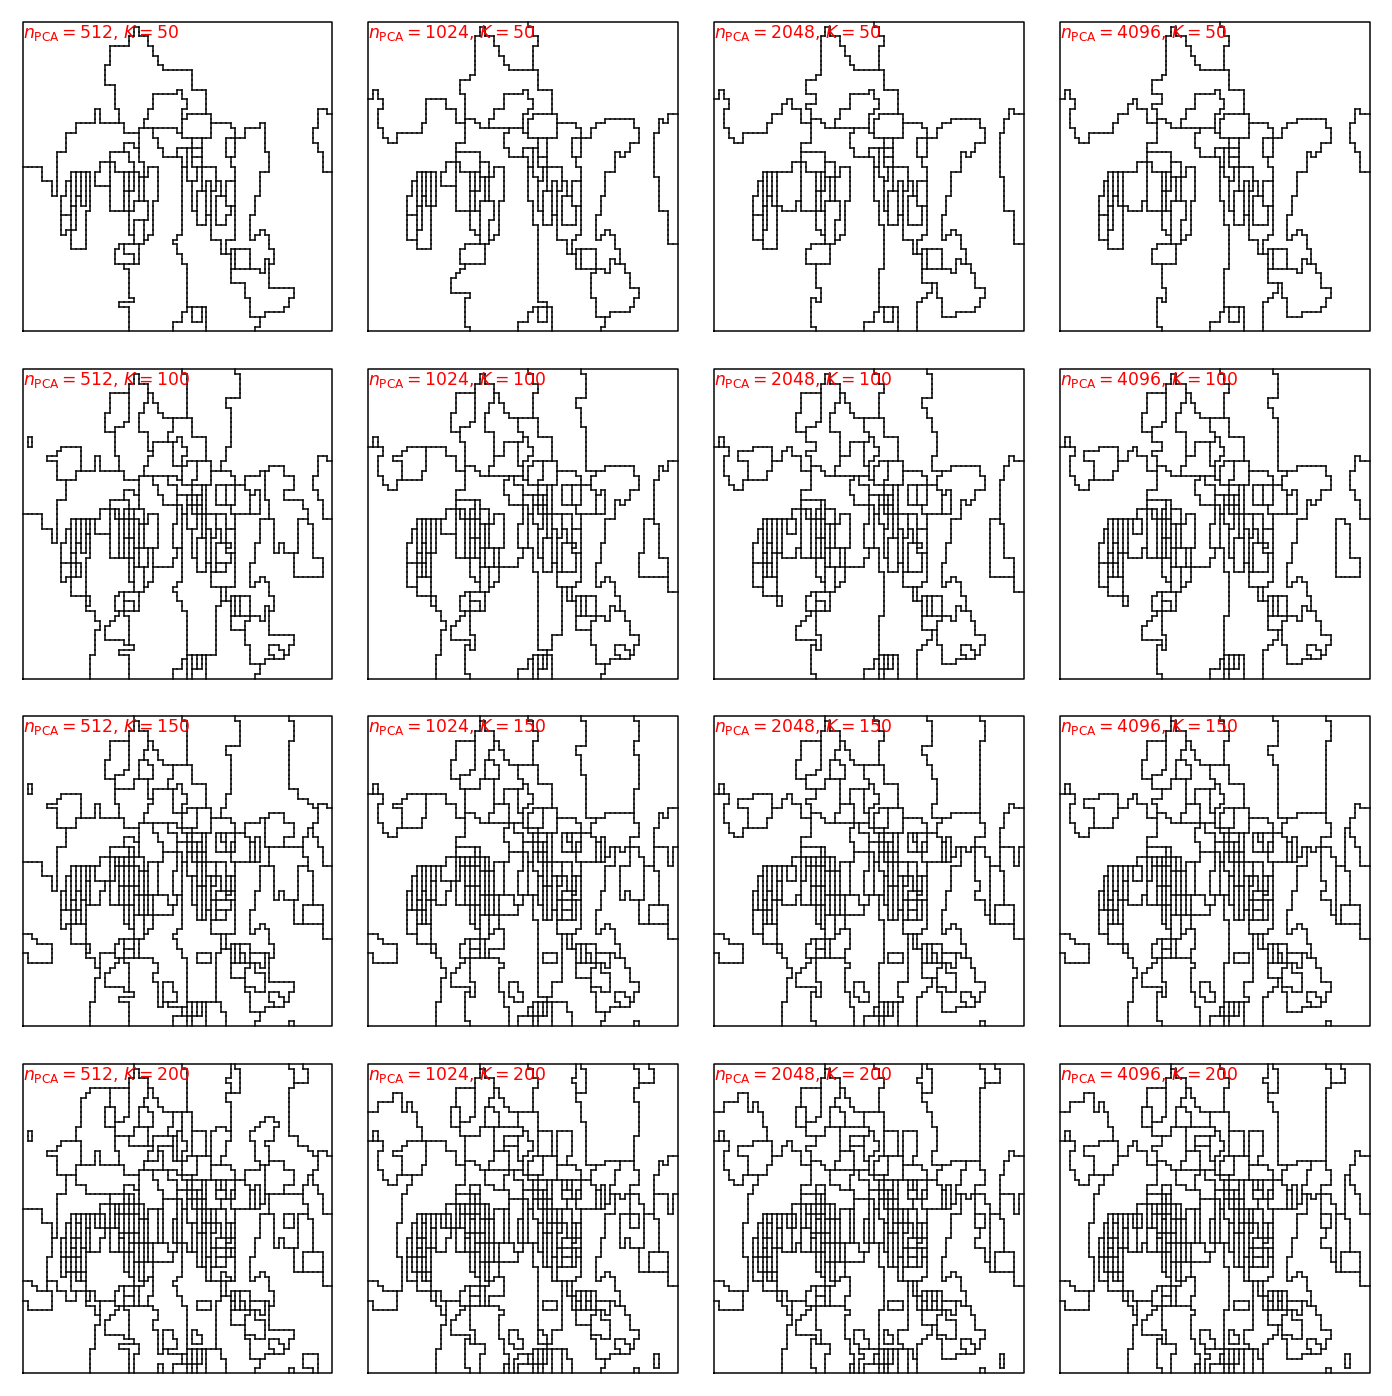

In [6]:
plt.clf()

def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.axis('off')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

nx,ny=64,64

FA_spatial=np.load('0-64-60-124/spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.6,bottom=0,top=1.6, wspace=0.002,hspace=0.02)

ns_pca=(512,1024,2048,4096)
ns_cluster=(50,100,150,200)

pca = PCA(n_components=4096, svd_solver='randomized')
pca_features=pca.fit_transform(FA_spatial)#components_

for i in range(4):

    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='ward').fit(pca_features[:,:ns_pca[i]])
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')